# Calculation of detectable Gamma ray burst (GRB) event rate associated with Binary Neutron Star (BNS) mergers.

* This is without considering a particular detectors' sensitivity, but rather a general calculation of the rate of detectable GRBs based of viewing angle and luminosity distance. I have considered the inclination angle gravitational waves same as the viewing angle wrt GRB jet axis.

* It involves constructing Pdet (detection probability) function based off luminosity function.

* For BNS source redshift and mass distribution, refer [here](https://ler.readthedocs.io/en/latest/GW_events.html).

* For lens and image properties, refer [here](https://ler.readthedocs.io/en/latest/Lensed_events.html).

* Both SWIFT and FERMI detectors are considered.

* All analysis will be limited to redshift $z\in [0,5]$.

## Result summary


### Condition 1 (EM->GW)

Steps:
1. Sample GRB detectable events from BNS merger events.
2. Calculate rate
3. Check, out of these GRB detectable events, how many are detectable in GWs.

I will consider sub-threshold events as detectable (snr>6).

<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GRB | 2127.81 | 1.51 | 1:1409.14 |
| GW | 0.297 | 1.8e-4 | 1:1650.00 |
| ratio(GRB/GW) | 7164.34 | 8389 | - | -->
<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GRB | 9459.41 | 7.446 | 1:1270 |
| GW | 1.135 | 8.94e-4 | 1:1269.57 |
| ratio(GW/GRB) | 1:8334 | 1:8329 | - | -->
| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GRB | 11483.41 | 9.2 | 1:1248.20 |
| GW(snr>8) | 1.55 | 4.6e-3 | 1:336.95 |
| ratio[GW(snr>8)/GRB] | 1:7407.41 | 1:2000 | - |
| GW(snr>6) | 4.02 | 1.1e-2 | 1:365.45 |
| ratio[GW(snr>6)/GRB] | 1:2857.14 | 1:833.33 | - |

### Condition 2 (GW->EM)

Steps:
1. Sample GW detectable events from BNS merger events.
2. Calculate rate
3. Check, out of these GW detectable events, how many are detectable in GRBs.

I will consider super-threshold events only (snr>8).

<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GW | 3.0 | 6.63e-3 | 1:452.83 |
| GRB | 0.123 | 1.54-4 | 1:12520.33 |
| ratio(GW/GRB) | 24.39 | 4.31 | - | -->
<!-- | Event | Unlensed | Lensed | ratio(Unlensed/Lensed) |
| --- | --- | --- | --- |
| GW | 13.18 | 2.96e-2 | 1:454.48 |
| GRB | 0.632 | 4.56e-4 | 1:1404.4 |
| ratio(GRB/GW) | 1:20 | 1:64 | - | -->
| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GW(snr>8) | 19.79 | 4.94e-2 | 1:400.6 |
| GRB (associated) | 1.9 | 2.7e-3 | 1:703.7 |
| ratio[GRB/GW(snr>8)] | 1:10.42 | 1:18.28 | - |
| GW(snr>6) | 48.14 | 1.36e-1 | 1:353.97 |
| GRB (associated) | 4.28 | 8.63e-3 | 1:495.94 |
| ratio[GRB/GW(snr>6)] | 1:11.24 | 1:15.78 | - |



## Equations (GRB)

* Ref: [Howell et. al. (2019)](https://arxiv.org/pdf/1811.09168)

* The luminosity function of GRBs is given by:

$$L(\theta_{V})=L_{c}\text{exp}(-\frac{\theta^{2}}{2\theta_{c}^{2}})$$

* Here, $L(\theta_{V})$ is the luminosity at viewing angle $\theta_{V}$, $L_{c}$ is the luminosity at the jet axis, $\theta$ is the viewing angle, and $\theta_{c}$ is the core angle of the jet.

* The paper gives: $\theta_{c} = 5$ degree.

* I will infer the probability of detection from the above equations.

$$P_{det}(\theta,D_L) = \left\{ 
  \begin{array}{ c l }
    1 & \text{if } \theta \le 5 \text{ deg and } D_L \le 46652 \text{ Mpc } (z\sim 5) \\
    1 & \text{if } \frac{\text{a}}{4\pi D_L^2} \text{exp}(-\frac{\theta^{2}}{2\times 21.2^2}) \ge 1 \\
    0 & \text{otherwise}
  \end{array}
\right.$$

* Coefficients a is solved by considering conditions 2 below.,
  1. If angle <= 5 deg, distance <= distance_cut, then $P_{det}$ = 1.
  2. pdet=1, If angle=21.2 deg (at distance=40Mpc). This is by considering the GRB from GW170817 would have been difficult to detect if viewing angle>21.2 deg (at distance=40Mpc) or distance>40 Mpc (at angle=21.2 deg).

In [1]:
from ler.rates import LeR
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json

## Probability of detection of GRBs

### Finding the coefficients

In [2]:
import numpy as np
from scipy.optimize import fsolve

# to find coefficient a
# consider: pdet = 1, If angle = 21.2 deg (at distance=40). 
def equation(a):
    angle = 21.2
    distance = 40
    return a/(4*np.pi*distance**2) * np.exp(-0.5*(angle/5)**2) - 1

a_guess = 10000

# Solve the equation
a_solution = fsolve(equation, a_guess)

print(f"a = {a_solution[0]}")

a = 161107621.34601912


### Function to calculate the probability of detection

In [3]:
# Find distance_cut, z=5
# convert redshift to luminoisty distance
import astropy.units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
z = 5
d_L = cosmo.luminosity_distance(z)
print(f"d_L = {d_L}")

d_L = 46652.22297277721 Mpc


In [4]:
# interpolation to convert luminoisty distance to redshift
from scipy import interpolate
z = np.geomspace(0.0001, 10, 1000)
d_L = cosmo.luminosity_distance(z)
dl_to_z = interpolate.interp1d(d_L, z)

In [5]:
# distance_cut: z ~ 5
def pdet_grb(angle, distance, distance_cut=46652, duty_cycle=0.5, mask_duty_cycle=True, bool=True, pdet_cut=1.):
    """
    Function to calculate the probability of detection for a given angle and distance for GRB. Coefficient involved is based on 2 the following conditions,

    Note: GRB jet, core angle <= 5 deg
    1. If angle <= 5 deg, distance <= distance_cut, then pdet(bool) = 1
    2. pdet=1, If angle=21.2 deg (at distance=40Mpc). This is by considering the GRB from GW170817 would have been difficult to detect if viewing angle<21.2 deg (at distance=40Mpc) or distance<40 Mpc (at angle=21.2 deg).

    Parameters
    ----------
    angle : numpy.ndarray
        Angle between the GRB jet and viewing angle in (rad)
    distance : numpy.ndarray
        Distance between the GRB source and the satellite in (Mpc)
    distance_cut : float
        Core angular size of the GRB jet in (rad)
        default is 25422.742 Mpc
    duty_cycle : float
        Duty cycle of detector(s)
        default is 0.5 (50%: for Fermi-GBM and Swift-BAT combined)
    bool : bool
        if True, return absolute value of pdet
        if False, return the pdet value as boolean (with duty cycle applied)
    """

    # coefficients, obtained with scipy.optimize fsolve by considering the condition 2,3 listed in docstring

    a = 161107621.34601912
    jet_angle_cut = 5

    # convert angle to degree
    angle = np.degrees(angle)

    # make sure that the input data is a numpy array
    angle, distance = np.array([angle]).reshape(-1), np.array([distance]).reshape(-1)

    # angle should be less than 90 or equal to 90
    if len(angle[angle > 90]) > 0:
        angle[angle > 90] = angle[angle > 90]%90

    if bool:
        # calculate the probability of detection, absolute value
        pdet = abs(a/(4*np.pi*distance**2) * np.exp(-0.5*(angle/jet_angle_cut)**2))

        # find idx of angle <= jet_angle_cut and distance <= distance_cut
        idx = (angle <= jet_angle_cut) & (distance <= distance_cut)
        # apply the condition, condition 1 from docstring
        pdet[idx] = 1

        if mask_duty_cycle:
            # apply the duty cycle
            # sample random numbers from 0 to 1 and check if it is less than the duty cycle
            num_ = np.random.rand(len(angle))
            mask_duty_cycle = num_ > duty_cycle
            pdet[mask_duty_cycle] = 0

        # return the pdet as boolean
        return (pdet>=pdet_cut).astype(int)
    else:
        # return the probability of detection (absolute value)
        return abs((1 / (1 + (angle / 5)**c))* (40/distance)**2 * a/(4*np.pi))

### test

In [6]:
angle = np.array([1, 1, 20, 90])
angle = np.radians(angle)
distance = np.array([46652, 46653, 40, 40])
print(pdet_grb(angle, distance, mask_duty_cycle=False, bool=True))

[1 0 1 0]


### Plot detection and non-detection

In [7]:
# generate random data
angle = np.random.uniform(0, 30, 5000)
log10_distance = np.random.uniform(0, 5, 5000)
distance = 10**log10_distance
redshift = dl_to_z(distance)

pdet = pdet_grb(np.radians(angle), distance, mask_duty_cycle=False, bool=True)

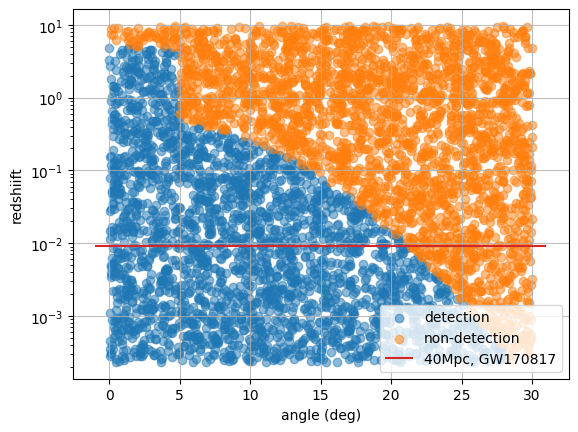

In [8]:
# blue: detection, red: non-detection
plt.scatter(angle[pdet==1], redshift[pdet==1], c='C0', label="detection", alpha=0.5)
plt.scatter(angle[pdet==0], redshift[pdet==0], c='C1', label="non-detection", alpha=0.5)

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=min(angle)-1, xmax=max(angle)+1, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("angle (deg)")
plt.ylabel("redshiift")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.8)
plt.show()

### Pdet condition checks

In [9]:
print("condition 1, pdet(angle=core_angle,distance=distance_cut): ", pdet_grb(angle=np.radians(5), distance=46652, mask_duty_cycle=False, bool=True))

print("condition 2")
print("  i) Detectable, pdet(angle=21.2deg,distance=40Mpc): ", pdet_grb(angle=np.radians(21.2), distance=40, mask_duty_cycle=False, bool=True))
print("  ii) Not-Detectable, pdet(angle=21.3deg,distance=40Mpc): ", pdet_grb(angle=np.radians(21.3), distance=40, mask_duty_cycle=False, bool=True))
print("  iii) Not-Detectable, pdet(angle=21.2deg,distance=50Mpc): ", pdet_grb(angle=np.radians(21.2), distance=50, mask_duty_cycle=False, bool=True))

condition 1, pdet(angle=core_angle,distance=distance_cut):  [1]
condition 2
  i) Detectable, pdet(angle=21.2deg,distance=40Mpc):  [1]
  ii) Not-Detectable, pdet(angle=21.3deg,distance=40Mpc):  [0]
  iii) Not-Detectable, pdet(angle=21.2deg,distance=50Mpc):  [0]


* let's write out the function so that it can be used in with LeR
  
* consider 50% duty cycle, i.e. it assume 50% of the sky is observable at any given time with SWIFT and FERMI detectors.

In [10]:
from gwsnr.utils import save_json_dict

# let's write out the function so that it can be used in with LeR
def pdet_calculator(gw_param_dict, duty_cycle=0.5, mask_duty_cycle=True, bool=True, output_jsonfile=False):
    """
    Function to calculate the probability of detection for a given angle and distance for GRB. This is based on the following condition

    Note: GRB jet, core angle <= 5 deg
    1. If angle <= 5 deg, distance <= distance_cut, then pdet(bool) = 1
    2. pdet=1, If angle=21.2 deg (at distance=40Mpc). This is by considering the GRB from GW170817 would have been difficult to detect if viewing angle<21.2 deg (at distance=40Mpc) or distance<40 Mpc (at angle=21.2 deg).

    Parameters
    ----------
    gw_param_dict : dict
        dictionary containing the parameters for the GW event
    """

    # get the angle and distance from the dictionary
    angle = gw_param_dict['theta_jn']
    if 'luminosity_distance' in gw_param_dict:
        distance = gw_param_dict['luminosity_distance']
    elif 'effective_luminosity_distance' in gw_param_dict:
        distance = gw_param_dict['effective_luminosity_distance']

    # calculate the probability of detection
    pdet = pdet_grb(angle, distance, duty_cycle=duty_cycle, mask_duty_cycle=mask_duty_cycle, bool=bool)
    pdet_net_dict = dict(pdet_net=pdet)

    # Save as JSON file, if output_jsonfile is provided
    if output_jsonfile:
        output_filename = (
            output_jsonfile if isinstance(output_jsonfile, str) else "pdet.json"
        )
        save_json_dict(pdet_net_dict, output_filename)

    # return the pdet
    return pdet_net_dict

In [11]:
# test
gw_param_dict = {'theta_jn': np.radians(np.array([1, 21.2, 90])), 'luminosity_distance': np.array([2500, 40, 40])}
print(pdet_calculator(gw_param_dict, mask_duty_cycle=False, bool=True))

{'pdet_net': array([1, 1, 0])}


## Rate calculation of GRB with LeR

All the necessary functions and parameters are defined below.

**Source related:**
* source frame mass: m1 and m2 sample from [double Gaussian](https://ler.readthedocs.io/en/latest/GW_events.html#BNS-mass-distribution:-Bimodal-Gaussian-Model) model lim[1,2.3]Mo
* Geocent time period: uniform prior, 1 year GPS: {'min_': 1238166018, 'max_': 1269702018}
* Redshift: 0 to 5, uniform, 
  * this follows [merger rate density distribution](https://ler.readthedocs.io/en/latest/GW_events.html#Merger-Rate-Density-Formula)
* ra:  sampler_uniform {'min_': 0.0, 'max_': 6.283185307179586}
* dec:  sampler_cosine [-np.pi/2, np.pi/2]
* phase : sampler_uniform {'min_': 0.0, 'max_': 6.283185307179586}
* psi: sampler_uniform {'min_': 0.0, 'max_': 3.141592653589793}
* theta_jn:   sampler_sine  [0, np.pi]

**Lens related**
* Optical depth: SIE , 
  * so zs for lensed are rejection sampled with optical depth. 
* Lens redshifts: SDSS catalogue (0 to zs), the function of zs Reenske et al. 2021 ( eqnC13). [`ler` function](https://github.com/hemantaph/ler/blob/bce3330638a13ee0883d19633abb17b98791c901/ler/lens_galaxy_population/jit_functions.py#L218)
* Velocity dispersion: gengamma, Haris et al 2018, a=2.32 / 2.67, c=2.67, vd_min=0., vd_max=600.(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gengamma.html) use in Haris et al upto zs~1.5 (with a=2.32 / 2.67, c=2.67)
* Axis ratio: Raleigh (with Velocity dispersion dependence) {'q_min': 0.2, 'q_max': 1.0}
* axis_rotation_angle : uniform {'phi_min': 0.0, 'phi_max': 6.283185307179586}
* shear: normal {'scale': 0.05}
* mass_density_spectral_index: normal {'mean': 2.0, 'std': 0.2}

**Image related:**
* Strong lensing condition: num_images>=2
* Lens equation solver: EPL+Shear, `lenstronomy`
* Source position: sample within caustic,  Ewoud et. al. 2022

In [38]:
# from ler.rates import LeR
# import numpy as np
# import matplotlib.pyplot as plt
ler = LeR(
    npool=6,
    verbose=False,
    z_max=5,
    pdet_finder=pdet_calculator,
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    event_type='BNS',
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

### Unlensed events

In [41]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=200000,
    batch_size=200000,
    resume=True,
    trim_to_size=True,
    detectability_condition="pdet",
    output_jsonfile="n_unlensed_params_detectable_grb2.json",
    meta_data_file="meta_unlensed_grb2.json",
)

collected number of detectable events =  0
collected number of detectable events =  5571
total number of events =  200000
total unlensed rate (yr^-1): 11509.353761665992
collected number of detectable events =  11085
total number of events =  400000
total unlensed rate (yr^-1): 11450.4744613236
collected number of detectable events =  16555
total number of events =  600000
total unlensed rate (yr^-1): 11400.547569220398
collected number of detectable events =  22080
total number of events =  800000
total unlensed rate (yr^-1): 11403.990803158551
collected number of detectable events =  27487
total number of events =  1000000
total unlensed rate (yr^-1): 11357.300550957212
collected number of detectable events =  33064
total number of events =  1200000
total unlensed rate (yr^-1): 11384.708693104902
collected number of detectable events =  38536
total number of events =  1400000
total unlensed rate (yr^-1): 11373.29683205274
collected number of detectable events =  44050
total number of

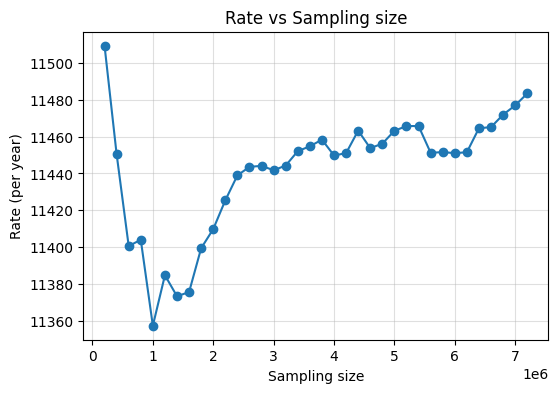

In [42]:
# getting data from json
meta_data= get_param_from_json("ler_data/meta_unlensed_grb2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [43]:
# select only events after sampling size of 
# idx = np.where(meta_data['events_total'] > 1e7)[0]
# # take average 
# grb_rate_unlensed1 = np.mean(meta_data['total_rate'][idx])
# print('Unlensed GRB Rate (per year) =', grb_rate_unlensed1)
grb_rate_unlensed1 = 11483.41

### Plots

In [86]:
unlensed_param_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_grb2.json")
zs = unlensed_param_detectable['zs']
viewing_angle = unlensed_param_detectable['theta_jn']
# radian to degree
viewing_angle = np.degrees(viewing_angle)
# if angle > 90, then angle = 180 - angle
viewing_angle[viewing_angle > 90] = viewing_angle[viewing_angle > 90]-90

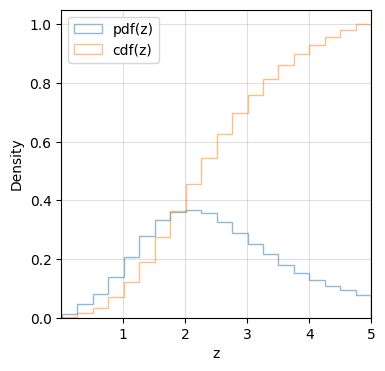

In [87]:
plt.figure(figsize=(4,4))
plt.hist(zs, bins=20, alpha=0.5, label='pdf(z)', density=True, histtype='step')
# cdf
plt.hist(zs, bins=20, alpha=0.5, label='cdf(z)', density=True, histtype='step', cumulative=True)
plt.xlabel('z')
plt.ylabel('Density')
plt.xlim(0.0001, 5)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

* for comparison refer to Fig.4 [Perley et. al.](https://arxiv.org/pdf/1504.02482)

* my rate is lower than the above paper, in the local universe.

* local merger rate density considered in `ler` for the BNS is 150.5 Gpc^-3 yr^-1 

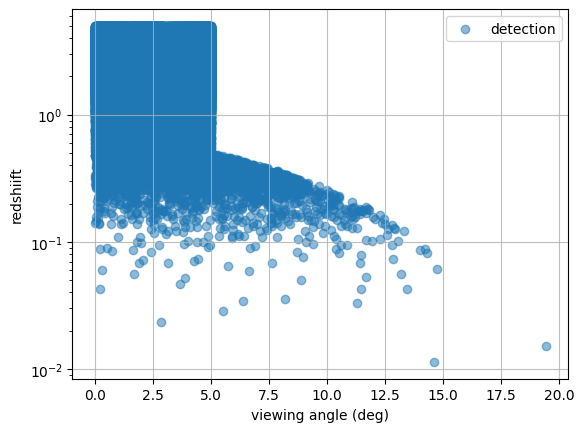

In [88]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="detection", alpha=0.5)

# draw a horizontal line for GW170817, 40Mpc
# plt.hlines(y=dl_to_z(40), xmin=min(angle)-1, xmax=max(angle)+1, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.8)
plt.show()

### Checking how many of these events are detectable in GWs

In [89]:
ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [90]:
unlensed_param_detectable = get_param_from_json("ler_data/n_unlensed_params_detectable_grb2.json")
snr_unlensed = ler.snr(gw_param_dict=unlensed_param_detectable)['optimal_snr_net']

In [91]:
# super-threshold only
# number of detectable events in terms of GW snr out of already detected events in term of GRB pdet
print(f"Number of unlensed detectable events in terms of GW snr is {np.sum(snr_unlensed>8)} \nout of {len(snr_unlensed)} events that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable unlensed GRBs is {grb_rate_unlensed1}, \nthen the rate of detectable GWs is {grb_rate_unlensed1*np.sum(snr_unlensed>8)/len(snr_unlensed)}\n")

print(f"ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = {len(snr_unlensed)/np.sum(snr_unlensed>8)}")

Number of unlensed detectable events in terms of GW snr is 27 
out of 200000 events that are already detected in terms of GRB pdet

if the rate of detectable unlensed GRBs is 11483.41, 
then the rate of detectable GWs is 1.55026035

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 7407.407407407408


* out of 7407 unlensed GRB events 1 is detectable in GWs (snr>8) as an associated event. 

In [92]:
# sub-threshold considered
# number of detectable events in terms of GW snr out of already detected events in term of GRB pdet
print(f"Number of unlensed detectable events in terms of GW snr is {np.sum(snr_unlensed>6)} \nout of {len(snr_unlensed)} events that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable unlensed GRBs is {grb_rate_unlensed1}, \nthen the rate of detectable GWs is {grb_rate_unlensed1*np.sum(snr_unlensed>6)/len(snr_unlensed)}\n")

print(f"ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = {len(snr_unlensed)/np.sum(snr_unlensed>6)}")

Number of unlensed detectable events in terms of GW snr is 70 
out of 200000 events that are already detected in terms of GRB pdet

if the rate of detectable unlensed GRBs is 11483.41, 
then the rate of detectable GWs is 4.0191935

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 2857.1428571428573


* out of 2857 unlensed GRB events 1 is detectable in GWs (snr>6) as an associated event. 

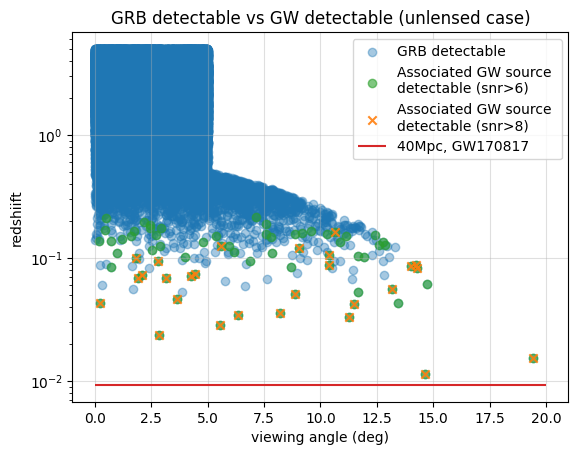

In [93]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="GRB detectable", alpha=0.4)
# only snr_unlensed>6
plt.scatter(viewing_angle[snr_unlensed>6], zs[snr_unlensed>6], c='C2', label="Associated GW source \ndetectable (snr>6)", alpha=0.6)
# only snr_unlensed>8
plt.scatter(viewing_angle[snr_unlensed>8], zs[snr_unlensed>8], c='C1', label="Associated GW source \ndetectable (snr>8)", alpha=0.9, marker='x')

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=0, xmax=20, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (unlensed case)")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### Lensed events

In [61]:
ler = LeR(
    npool=6,
    verbose=False,
    z_max=5,
    pdet_finder=pdet_calculator,
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    event_type='BNS',
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [62]:
lensed_param_detectable = ler.selecting_n_lensed_detectable_events(
    size=20000,
    batch_size=200000,
    # snr_threshold=[8.0,8.0],
    # num_img=[1,1],
    resume=True,
    trim_to_size=True,
    detectability_condition="pdet",
    output_jsonfile="n_lensed_params_detectable_grb2.json",
    meta_data_file="meta_lensed_grb2.json",
)

collected number of detectable events =  21231.0
storing detectable lensed params in ./ler_data/n_lensed_params_detectable_grb2.json

 trmming final result to size=20000


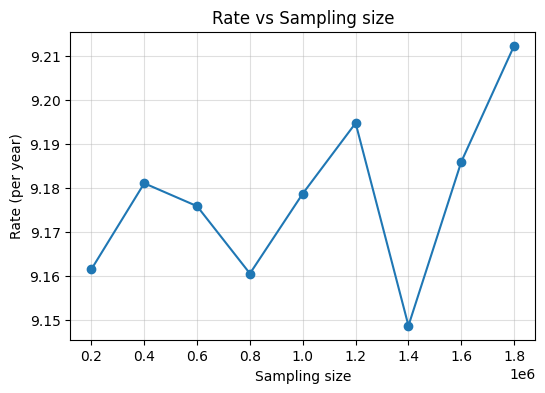

In [63]:
# getting data from json
meta_data= get_param_from_json("ler_data/meta_lensed_grb2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [64]:
# select only events after sampling size of 
# idx = np.where(meta_data['events_total'] > 2.5e6)[0]
# # take average 
# grb_rate_lensed1 = np.mean(meta_data['total_rate'][idx])
# print('Lensed GRB Rate (per year) =', grb_rate_lensed1)
grb_rate_lensed1 = 9.2

### Plots

In [68]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_grb2.json")
zs = lensed_param_detectable['zs']
viewing_angle = lensed_param_detectable['theta_jn']
# radian to degree
viewing_angle = np.degrees(viewing_angle)
# if angle > 90, then angle = 180 - angle
viewing_angle[viewing_angle > 90] = viewing_angle[viewing_angle > 90]-90

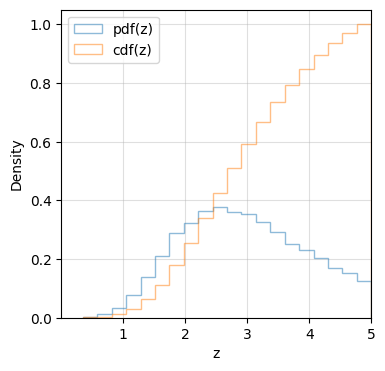

In [69]:
plt.figure(figsize=(4,4))
plt.hist(zs, bins=20, alpha=0.5, label='pdf(z)', density=True, histtype='step')
# cdf
plt.hist(zs, bins=20, alpha=0.5, label='cdf(z)', density=True, histtype='step', cumulative=True)
plt.xlabel('z')
plt.ylabel('Density')
plt.xlim(0.0001, 5)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

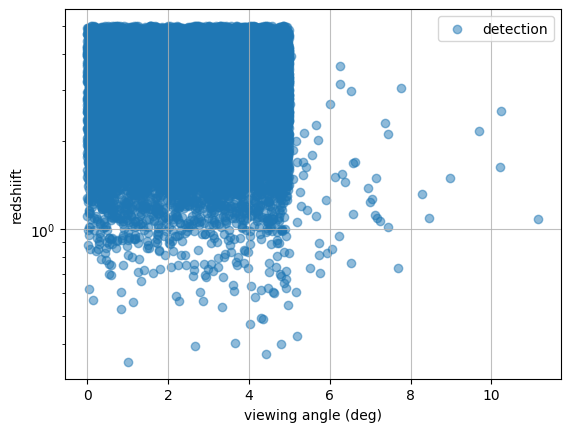

In [70]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="detection", alpha=0.5)

# draw a horizontal line for GW170817, 40Mpc
# plt.hlines(y=dl_to_z(40), xmin=min(angle)-1, xmax=max(angle)+1, colors='C3', linestyles='solid', label='40Mpc, GW170817')

plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.8)
plt.show()

* at high redshift (z>1), detection of off-axis GRBs is still possible for the lensed case, but not for the unlensed case.

### Out of the detected GRB events, how many are detectable in GW.

* find out GW detector SNRs of the event which are detectable in GRBs.

* check how many of them cross the SNR threshold

In [71]:
# ler initialization with default snr calculator (gwsnr)
ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [72]:
# get snr for the lensed events
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_grb2.json")
snr_lensed, _ = ler.get_lensed_snrs(lensed_param_detectable, list_of_detectors=['L1','H1','V1'], snr_calculator=ler.snr)
snr_lensed = snr_lensed['optimal_snr_net']

In [73]:
# only super-threshold events
num_ =  np.sum(np.sum(snr_lensed>8, axis=1)>=2)
print(f"Number of lensed detectable events in terms of GW snr is {num_} out of {len(snr_lensed)} \nevents that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable lensed GRBs is {grb_rate_lensed1}, \nthen the rate of detectable GWs is {grb_rate_lensed1*num_/len(snr_lensed)}\n")

print(f"ratio (lensed detectable GRBs)/(lensed detectable GWs) = {len(snr_lensed)/num_}")

Number of lensed detectable events in terms of GW snr is 10 out of 20000 
events that are already detected in terms of GRB pdet

if the rate of detectable lensed GRBs is 9.2, 
then the rate of detectable GWs is 0.0046

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 2000.0


* out of 2000 lensed GRB events 1 is detectable in GWs (2 images snr>8) as an associated event. 

In [74]:
# sub-threshold events considered
num_ =  np.sum(np.sum(snr_lensed>6, axis=1)>=2)
print(f"Number of lensed detectable events in terms of GW snr is {num_} out of {len(snr_lensed)} \nevents that are already detected in terms of GRB pdet\n")

print(f"if the rate of detectable lensed GRBs is {grb_rate_lensed1}, \nthen the rate of detectable GWs is {grb_rate_lensed1*num_/len(snr_lensed)}\n")

print(f"ratio (lensed detectable GRBs)/(lensed detectable GWs) = {len(snr_lensed)/num_}")

Number of lensed detectable events in terms of GW snr is 24 out of 20000 
events that are already detected in terms of GRB pdet

if the rate of detectable lensed GRBs is 9.2, 
then the rate of detectable GWs is 0.01104

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 833.3333333333334


* out of 833 lensed GRB events 1 is detectable in GWs (2 images snr>6) as an associated event. 

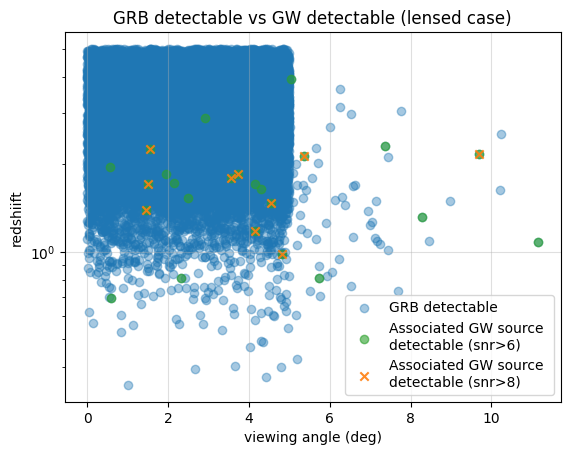

In [80]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="GRB detectable", alpha=0.4)
# only snr_unlensed>6
idx_ = np.sum(snr_lensed>6, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C2', label="Associated GW source \ndetectable (snr>6)", alpha=0.6)
# only snr_unlensed>8
idx_ = np.sum(snr_lensed>8, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C1', label="Associated GW source \ndetectable (snr>8)", alpha=0.9, marker='x')


plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (lensed case)")
plt.yscale("log")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

<!-- if the rate of detectable unlensed GRBs is 11483.41, 
then the rate of detectable GWs is 1.55026035

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 7407.407407407408

if the rate of detectable unlensed GRBs is 11483.41, 
then the rate of detectable GWs is 4.0191935

ratio (unlensed detectable GRBs)/(unlensed detectable GWs) = 2857.1428571428573

if the rate of detectable lensed GRBs is 9.2, 
then the rate of detectable GWs is 0.0046

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 2000.0

if the rate of detectable lensed GRBs is 9.2, 
then the rate of detectable GWs is 0.01104

ratio (lensed detectable GRBs)/(lensed detectable GWs) = 833.3333333333334 -->

## results

### Table for GRB and GW number of events

| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GRB | 11483.41 | 9.2 | 1:1248.20 |
| GW(snr>8)(associated) | 1.55 | 4.6e-3 | 1:336.95 |
| ratio[GW(snr>8)/GRB] | 1:7407.41 | 1:2000 | - |
| GW(snr>6)(associated) | 4.02 | 1.1e-2 | 1:365.45 |
| ratio[GW(snr>6)/GRB] | 1:2857.14 | 1:833.33 | - |

## GW detection first

### Unlensed events

In [98]:
# from ler.rates import LeR
# from ler.utils import get_param_from_json

ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

### Sub

In [132]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=1000,
    batch_size=200000,
    snr_threshold=6.0,
    resume=True,
    trim_to_size=True,
    output_jsonfile="n_unlensed_params_detectable_gw_sub2.json",
    meta_data_file="meta_unlensed_gw_sub2.json",
)

collected number of detectable events =  0
collected number of detectable events =  21
total number of events =  200000
total unlensed rate (yr^-1): 43.38474762071188
collected number of detectable events =  42
total number of events =  400000
total unlensed rate (yr^-1): 43.38474762071188
collected number of detectable events =  61
total number of events =  600000
total unlensed rate (yr^-1): 42.00745404545118
collected number of detectable events =  83
total number of events =  800000
total unlensed rate (yr^-1): 42.86826252998912
collected number of detectable events =  105
total number of events =  1000000
total unlensed rate (yr^-1): 43.38474762071188
collected number of detectable events =  127
total number of events =  1200000
total unlensed rate (yr^-1): 43.72907101452705
collected number of detectable events =  152
total number of events =  1400000
total unlensed rate (yr^-1): 44.86041930849119
collected number of detectable events =  174
total number of events =  1600000
tota

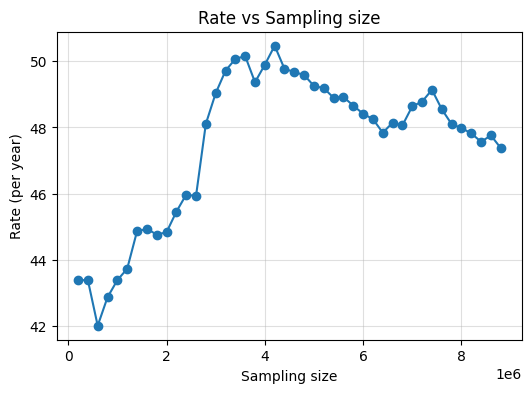

In [133]:
# rate
meta_data= get_param_from_json("ler_data/meta_unlensed_gw_sub2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [134]:
# select only events after sampling size of
idx = np.where(meta_data['events_total'] > 6e6)[0]
# take average
gw_rate_unlensed_sub2 = np.mean(meta_data['total_rate'][idx])
print('Unlensed GW Rate (per year) =', gw_rate_unlensed_sub2)

Unlensed GW Rate (per year) = 48.14259004506836


### How many detectable events are there in terms of GRB pdet out of already detected events in terms of GW snr?

In [136]:
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw_sub2.json')
unlensed_grb_pdet = pdet_calculator(unlensed_param_detectable)

In [137]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of unlensed detectable events in terms of GRB pdet is {np.sum(unlensed_grb_pdet['pdet_net']==1)} \nout of {len(unlensed_grb_pdet['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable unlensed GWs is {gw_rate_unlensed_sub2}, \nthen the rate of detectable GRBs is {gw_rate_unlensed_sub2*np.sum(unlensed_grb_pdet['pdet_net']==1)/len(unlensed_grb_pdet['pdet_net'])}\n")

print(f"ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = {len(unlensed_grb_pdet['pdet_net'])/np.sum(unlensed_grb_pdet['pdet_net']==1)}")

Number of unlensed detectable events in terms of GRB pdet is 89 
out of 1000 events that are already detected in terms of GW snr

if the rate of detectable unlensed GWs is 48.14259004506836, 
then the rate of detectable GRBs is 4.284690514011084

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 11.235955056179776


In [171]:
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw_sub2.json')
zs = unlensed_param_detectable['zs']
viewing_angle = unlensed_param_detectable['theta_jn']
# radian to degree
viewing_angle = np.degrees(viewing_angle)
# if angle > 90, then angle = 180 - angle
viewing_angle[viewing_angle > 90] = viewing_angle[viewing_angle > 90]-90

snr_unlensed = unlensed_param_detectable['optimal_snr_net']

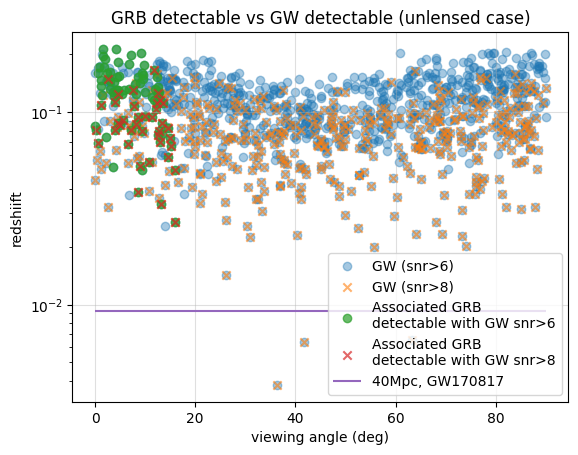

In [177]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="GW (snr>6)", alpha=0.4)

# # only snr_unlensed>8
idx_ = snr_unlensed>8
plt.scatter(viewing_angle[idx_], zs[idx_], c='C1', label="GW (snr>8)", alpha=0.6, marker='x')

# only snr_unlensed>6
idx_ = unlensed_grb_pdet['pdet_net']==1
plt.scatter(viewing_angle[idx_], zs[idx_], c='C2', label="Associated GRB \ndetectable with GW snr>6", alpha=0.7)

# only snr_unlensed>8
idx_snr = snr_unlensed>8
idx_ = unlensed_grb_pdet['pdet_net'][idx_snr]==1
plt.scatter(viewing_angle[idx_snr][idx_], zs[idx_snr][idx_], c='C3', label="Associated GRB \ndetectable with GW snr>8", alpha=0.7, marker='x')

# draw a horizontal line for GW170817, 40Mpc
plt.hlines(y=dl_to_z(40), xmin=0, xmax=90, colors='C4', linestyles='solid', label='40Mpc, GW170817')


plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (unlensed case)")
plt.yscale("log")
# plt.xlim(0.0, 20)
# lengend position left-down
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()

In [135]:
unlensed_param_detectable = ler.selecting_n_unlensed_detectable_events(
    size=1000,
    batch_size=200000,
    snr_threshold=8.0,
    resume=True,
    trim_to_size=True,
    output_jsonfile="n_unlensed_params_detectable_gw2.json",
    meta_data_file="meta_unlensed_gw2.json",
)

collected number of detectable events =  1000
storing detectable unlensed params in ./ler_data/n_unlensed_params_detectable_gw2.json

 trmming final result to size=1000


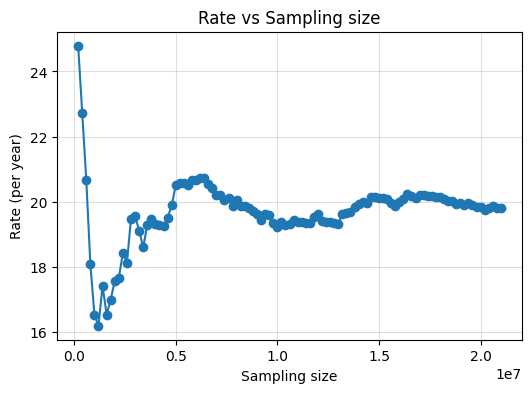

In [100]:
# rate
meta_data= get_param_from_json("ler_data/meta_unlensed_gw2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [101]:
# select only events after sampling size of
# idx = np.where(meta_data['events_total'] > 2.5e7)[0]
# # take average
# gw_rate_unlensed2 = np.mean(meta_data['total_rate'][idx])
# print('Unlensed GW Rate (per year) =', gw_rate_unlensed2)
gw_rate_unlensed2 = 19.79

### How many detectable events are there in terms of GRB pdet out of already detected events in terms of GW snr?

In [102]:
unlensed_param_detectable = get_param_from_json('./ler_data/n_unlensed_params_detectable_gw2.json')
unlensed_grb_pdet = pdet_calculator(unlensed_param_detectable)

In [103]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of unlensed detectable events in terms of GRB pdet is {np.sum(unlensed_grb_pdet['pdet_net']==1)} \nout of {len(unlensed_grb_pdet['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable unlensed GWs is {gw_rate_unlensed2}, \nthen the rate of detectable GRBs is {gw_rate_unlensed2*np.sum(unlensed_grb_pdet['pdet_net']==1)/len(unlensed_grb_pdet['pdet_net'])}\n")

print(f"ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = {len(unlensed_grb_pdet['pdet_net'])/np.sum(unlensed_grb_pdet['pdet_net']==1)}")

Number of unlensed detectable events in terms of GRB pdet is 96 
out of 1000 events that are already detected in terms of GW snr

if the rate of detectable unlensed GWs is 19.79, 
then the rate of detectable GRBs is 1.89984

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 10.416666666666666


### Lensed events

In [104]:
ler = LeR(
    verbose=False,
    z_max=5,
    event_type='BNS',
    source_priors={'theta_jn': 'sampler_uniform',},
    source_priors_params={'theta_jn': {'min_': 0, 'max_': np.pi},},
    mtot_max=51,
    ifos=['L1','H1','V1'],
)

In [105]:
# sub-threshold events considered
lensed_param_detectable = ler.selecting_n_lensed_detectable_events(
    size=10000,
    batch_size=200000,
    snr_threshold=[6.0,6.0],
    num_img=[1,1],
    resume=True,
    output_jsonfile="n_lensed_params_detectable_gw2.json",
    meta_data_file="meta_lensed_gw2.json",
)

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.37it/s]


collected number of events =  33
total number of events =  200000
total lensed rate (yr^-1): 0.1288706299916682


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.91it/s]


collected number of events =  59
total number of events =  400000
total lensed rate (yr^-1): 0.11520253287133977


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


collected number of events =  116
total number of events =  600000
total lensed rate (yr^-1): 0.15099993009124762


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.27s/it]


collected number of events =  145
total number of events =  800000
total lensed rate (yr^-1): 0.14156243446054462


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.62it/s]


collected number of events =  184
total number of events =  1000000
total lensed rate (yr^-1): 0.1437102782937391


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.19s/it]


collected number of events =  217
total number of events =  1200000
total lensed rate (yr^-1): 0.1412370035767273


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.58it/s]


collected number of events =  256
total number of events =  1400000
total lensed rate (yr^-1): 0.14281766786955438


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.08it/s]


collected number of events =  296
total number of events =  1600000
total lensed rate (yr^-1): 0.14449131241490074


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.02s/it]


collected number of events =  319
total number of events =  1800000
total lensed rate (yr^-1): 0.13841660258364363


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.16it/s]


collected number of events =  351
total number of events =  2000000
total lensed rate (yr^-1): 0.13707148826386528


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.70s/it]


collected number of events =  386
total number of events =  2200000
total lensed rate (yr^-1): 0.13703598671290337


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.06it/s]


collected number of events =  414
total number of events =  2400000
total lensed rate (yr^-1): 0.13472838590038042


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.18it/s]


collected number of events =  442
total number of events =  2600000
total lensed rate (yr^-1): 0.13277580059747635


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.38it/s]


collected number of events =  484
total number of events =  2800000
total lensed rate (yr^-1): 0.13500732665793813


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.70it/s]


collected number of events =  513
total number of events =  3000000
total lensed rate (yr^-1): 0.13355683471863797


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.62it/s]


collected number of events =  554
total number of events =  3200000
total lensed rate (yr^-1): 0.13521653222610644


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.71s/it]


collected number of events =  598
total number of events =  3400000
total lensed rate (yr^-1): 0.1373701189572506


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.76it/s]


collected number of events =  635
total number of events =  3600000
total lensed rate (yr^-1): 0.13776574081600895


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.21s/it]


collected number of events =  669
total number of events =  3800000
total lensed rate (yr^-1): 0.1375031123834546


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.33it/s]


collected number of events =  697
total number of events =  4000000
total lensed rate (yr^-1): 0.13609519561241326


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.39it/s]


collected number of events =  726
total number of events =  4200000
total lensed rate (yr^-1): 0.13500732665793813


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.61it/s]


collected number of events =  768
total number of events =  4400000
total lensed rate (yr^-1): 0.13632595569366554


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


collected number of events =  800
total number of events =  4600000
total lensed rate (yr^-1): 0.13583202107158704


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


collected number of events =  842
total number of events =  4800000
total lensed rate (yr^-1): 0.13700640208710183


100%|███████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.97it/s]


collected number of events =  872
total number of events =  5000000
total lensed rate (yr^-1): 0.1362123507305875


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.54s/it]


collected number of events =  906
total number of events =  5200000
total lensed rate (yr^-1): 0.13608017572546782


100%|█████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.87s/it]


collected number of events =  934
total number of events =  5400000
total lensed rate (yr^-1): 0.13508997577128856


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.47it/s]


collected number of events =  971
total number of events =  5600000
total lensed rate (yr^-1): 0.13542573779427472


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.05it/s]


collected number of events =  1013
total number of events =  5800000
total lensed rate (yr^-1): 0.13641164909253908


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.08it/s]


collected number of events =  1057
total number of events =  6000000
total lensed rate (yr^-1): 0.13759217767797305


  0%|                                                                         | 0/3 [00:01<?, ?it/s]


KeyboardInterrupt: 

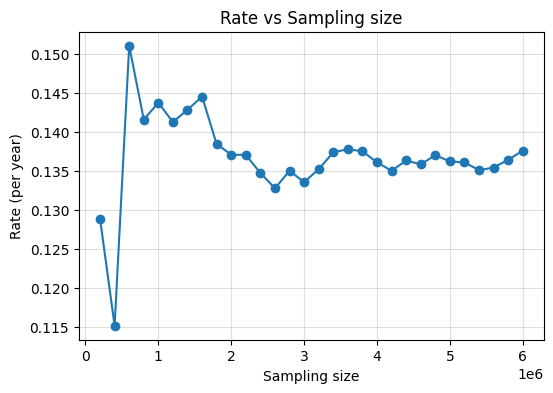

In [117]:
# rate 
meta_data= get_param_from_json("ler_data/meta_lensed_gw2.json")

# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [124]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw2.json")
# select only events after sampling size of
idx = np.where(meta_data['events_total'] > 4e6)[0]
# take average
gw_rate_lensed_sub2 = np.mean(meta_data['total_rate'][idx])
print('Lensed GW Rate (per year, sub-threshold considered) =', gw_rate_lensed_sub2)

# check how many of the events are super-threshold
snr_lensed = lensed_param_detectable['optimal_snr_net']
# only super-threshold events
num_ =  np.sum(np.sum(snr_lensed>8, axis=1)>=2)

gw_rate_lensed_super2 = gw_rate_lensed_sub2*num_/len(snr_lensed)
print('Lensed GW Rate (per year, super-threshold considered) =', gw_rate_lensed_super2)

Lensed GW Rate (per year, sub-threshold considered) = 0.13609837723024235
Lensed GW Rate (per year, super-threshold considered) = 0.04944349749897168


In [125]:
# save the data for new_lensed_param_detectable
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw2.json")
snr_lensed = lensed_param_detectable['optimal_snr_net']
new_lensed_param_detectable = {}

# select only super-threshold events
idx = np.where(np.sum(snr_lensed>8, axis=1)>=2)[0]
for key in lensed_param_detectable.keys():
    new_lensed_param_detectable[key] = lensed_param_detectable[key][idx]

# save the data
from ler.utils import append_json

lensed_param_detectable = append_json("ler_data/n_lensed_params_detectable_gw_super2.json", new_lensed_param_detectable, replace=True)

### How many detectable events are there in terms of GRB pdet out of already detected events in terms of GW snr?

### SUB

In [128]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw2.json")
# get snr for the lensed events
pdet_lensed,_ = ler.get_lensed_snrs(
    lensed_param=lensed_param_detectable,
    list_of_detectors=['L1','H1','V1'],
    pdet_calculator=pdet_calculator,
)

# only detectable GRBs
num_ =  np.sum(np.sum(pdet_lensed['pdet_net']==1, axis=1)>=2)

In [129]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of lensed detectable events in terms of GRB pdet is {num_} \nout of {len(pdet_lensed['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable lensed GWs is {gw_rate_lensed_sub2}, \nthen the rate of detectable GRBs is {gw_rate_lensed_sub2*num_/len(pdet_lensed['pdet_net'])}\n")

print(f"ratio (lensed detectable GWs)/(lensed detectable GRBs) = {len(pdet_lensed['pdet_net'])/num_}")

Number of lensed detectable events in terms of GRB pdet is 67 
out of 1057 events that are already detected in terms of GW snr

if the rate of detectable lensed GWs is 0.13609837723024235, 
then the rate of detectable GRBs is 0.008626860240705995

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 15.776119402985074


### SUPER

In [130]:
lensed_param_detectable = get_param_from_json("ler_data/n_lensed_params_detectable_gw_super2.json")
# get snr for the lensed events
pdet_lensed,_ = ler.get_lensed_snrs(
    lensed_param=lensed_param_detectable,
    list_of_detectors=['L1','H1','V1'],
    pdet_calculator=pdet_calculator,
)

# only detectable GRBs
num_ =  np.sum(np.sum(pdet_lensed['pdet_net']==1, axis=1)>=2)

In [131]:
# number of detectable events in terms of GRB pdet out of already detected events in term of GW snr
print(f"Number of lensed detectable events in terms of GRB pdet is {num_} \nout of {len(pdet_lensed['pdet_net'])} events that are already detected in terms of GW snr\n")

print(f"if the rate of detectable lensed GWs is {gw_rate_lensed_super2}, \nthen the rate of detectable GRBs is {gw_rate_lensed_super2*num_/len(pdet_lensed['pdet_net'])}\n")

print(f"ratio (lensed detectable GWs)/(lensed detectable GRBs) = {len(pdet_lensed['pdet_net'])/num_}")


Number of lensed detectable events in terms of GRB pdet is 21 
out of 384 events that are already detected in terms of GW snr

if the rate of detectable lensed GWs is 0.04944349749897168, 
then the rate of detectable GRBs is 0.0027039412694750136

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 18.285714285714285


### Plot

In [195]:
lensed_param_detectable = get_param_from_json('./ler_data/n_lensed_params_detectable_gw2.json')
zs = lensed_param_detectable['zs']
viewing_angle = lensed_param_detectable['theta_jn']
# radian to degree
viewing_angle = np.degrees(viewing_angle)
# if angle > 90, then angle = 180 - angle
viewing_angle[viewing_angle > 90] = viewing_angle[viewing_angle > 90]-90

snr_lensed = lensed_param_detectable['optimal_snr_net']
# get snr for the lensed events
pdet_lensed,_ = ler.get_lensed_snrs(
    lensed_param=lensed_param_detectable,
    list_of_detectors=['L1','H1','V1'],
    pdet_calculator=pdet_calculator,
)


In [196]:
len(viewing_angle), len(viewing_angle[idx_])

(1057, 69)

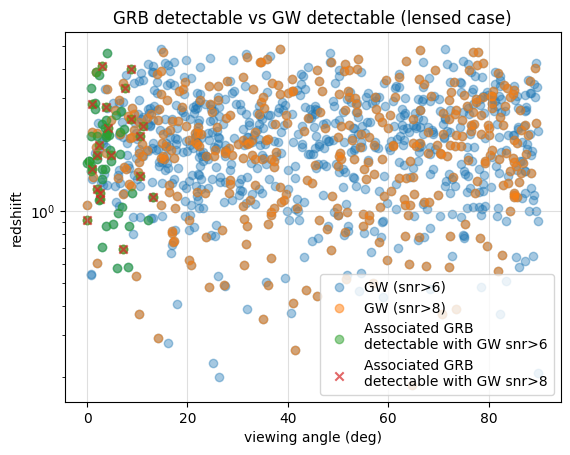

In [200]:
# blue: detection, red: non-detection
plt.scatter(viewing_angle, zs, c='C0', label="GW (snr>6)", alpha=0.4)

# # only snr_lensed>8
idx_ = np.sum(snr_lensed>8, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C1', label="GW (snr>8)", alpha=0.5)

# # only snr_unlensed>6
idx_ =  np.sum(pdet_lensed['pdet_net']==1, axis=1)>=2
plt.scatter(viewing_angle[idx_], zs[idx_], c='C2', label="Associated GRB \ndetectable with GW snr>6", alpha=0.5)

# # only snr_unlensed>8
idx_snr = np.sum(snr_lensed>8, axis=1)>=2
idx_ = np.sum(pdet_lensed['pdet_net'][idx_snr]==1, axis=1)>=2
plt.scatter(viewing_angle[idx_snr][idx_], zs[idx_snr][idx_], c='C3', label="Associated GRB \ndetectable with GW snr>8", alpha=0.7, marker='x')

# # draw a horizontal line for GW170817, 40Mpc
# plt.hlines(y=dl_to_z(40), xmin=0, xmax=90, colors='C4', linestyles='solid', label='40Mpc, GW170817')


plt.xlabel("viewing angle (deg)")
plt.ylabel("redshiift")
plt.title("GRB detectable vs GW detectable (lensed case)")
plt.yscale("log")
# plt.xlim(0.0, 20)
# lengend position left-down
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.show()

# sub unlensed
if the rate of detectable unlensed GWs is 48.14259004506836, 
then the rate of detectable GRBs is 4.284690514011084

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 11.235955056179776

# super unlensed
if the rate of detectable unlensed GWs is 19.79, 
then the rate of detectable GRBs is 1.89984

ratio (unlensed detectable GWs)/(unlensed detectable GRBs) = 10.416666666666666

# sub lensed
if the rate of detectable lensed GWs is 0.13609837723024235, 
then the rate of detectable GRBs is 0.008626860240705995

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 15.776119402985074

# super lensed
if the rate of detectable lensed GWs is 0.04944349749897168, 
then the rate of detectable GRBs is 0.0027039412694750136

ratio (lensed detectable GWs)/(lensed detectable GRBs) = 18.285714285714285

In [142]:
4.28 / 8.63e-3

495.9443800695249

## Final results

### Table for GRB and GW rates

| Event | Unlensed | Lensed | ratio[Unlensed/Lensed] |
| --- | --- | --- | --- |
| GW(snr>8) | 19.79 | 4.94e-2 | 1:400.6 |
| GRB (associated) | 1.9 | 2.7e-3 | 1:703.7 |
| ratio[GRB/GW(snr>8)] | 1:10.42 | 1:18.28 | - |
| GW(snr>6) | 48.14 | 1.36e-1 | 1:353.97 |
| GRB (associated) | 4.28 | 8.63e-3 | 1:495.94 |
| ratio[GRB/GW(snr>6)] | 1:11.24 | 1:15.78 | - |


Important takeaways:

Unlensed (detectable): out of 20 GW BNS events, we can expect 1 GRB counter part.

Lensed (detectable): out of 65 GW BNS events, we can expect 1 GRB counter part.